# Tarea 3. Estadística
Katherin A. Murcia S. y Juan Carlos Rojas V.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

_Propagting the error through a multi-variable function_ 

Three variables are measured to be $A = 12.3 \pm 0.4$, $B=5.6 \pm 0.8$ and $C = 89.0 \pm 0.2$. Calculate the mean and ucertatinties of $Z$ when it is related to $A$, $B$ and $C$ via the relations:

In [3]:
# Dado que soy un perezoso, dejaré que SymPy haga las derivadas.
a,b,c,un_a,un_b,un_c = sym.symbols("A B C sigma_A sigma_B sigma_C")

A = 12.3 # Medida promedio de A
un_A = 0.4 # Incertidumbre de A
B = 5.6 # Medida promedio de B
un_B = 0.8 # Incertidumbre de B
C = 89.0 # Medida promedio de C
un_C = 0.2 # Incertidumbre de C

**(i)** $Z = A + B$

Calculando la incertidumbre de $Z$, se tiene que 
$$\sigma_Z = \sqrt{\left(\frac{\partial Z}{\partial A}\right)^2\sigma_A^2 + \left( \frac{\partial Z}{\partial B}\right)^2\sigma_B^2}$$

Para la derivada parcial de $Z$ con respecto de $A$ está dada por $\frac{\partial Z}{\partial A} = 1$. Análogamente para $B$, se tiene que $\frac{\partial Z}{\partial B} = 1$ por tanto:
$$\sigma_Z = \sqrt{\sigma^2_A + \sigma_B^2}.$$

Se obtiene entonces que para $Z = A +B$ el calculo de $Z$ es:

In [4]:
un_Z = np.sqrt(un_A**2 + un_B**2) # Incertidumbre de Z
Z = A + B # Medida promedio de Z
Z,un_Z

(17.9, np.float64(0.894427190999916))

Se tiene entonces que $\bar{Z} = 17.9$ y $\sigma_Z = 0.9$.

**(ii)** $Z = A - B$

Similarmente que para el punto anterior, se tomando las derivadas parciales con respecto a cada variable. Sin embargo, la derivada parcial de $Z$ con respecto de $B$ va a ser $-1$. Por lo que se tiene que $\sigma_Z$ está dado por:
$$\sigma_Z = \sqrt{\sigma_A^2 + (-1)^2\sigma_B^2} = \sqrt{\sigma_A^2 + \sigma_B^2}$$

Por tanto, la incertidumbre va a ser la misma que para el punto anterior. Ahora, para el promedio, se tiene que:

In [5]:
Z = A - B
un_Z = np.sqrt(un_A**2 + un_B**2)
Z,un_Z

(6.700000000000001, np.float64(0.894427190999916))

Se tiene entonces que $\bar{Z} = 6.7$ y $\sigma_Z = 0.9$.

**(iii)** $Z = \frac{A - B}{A+B}$

Definiendo la expresión en SymPy:

In [6]:
z = (a-b)/(a+b)
z

(A - B)/(A + B)

Tomando la derivada parcial con respecto a $A$:

In [7]:
dzda = sym.diff(z,a)
dzda

-(A - B)/(A + B)**2 + 1/(A + B)

Tomando la derivada parcial con respecto a $B$:

In [8]:
dzdb = sym.diff(z,b)
dzdb

-(A - B)/(A + B)**2 - 1/(A + B)

La incertidumbre $\sigma_Z$ es, entonces:

In [9]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2)
un_z

sqrt(sigma_A**2*(-(A - B)/(A + B)**2 + 1/(A + B))**2 + sigma_B**2*(-(A - B)/(A + B)**2 - 1/(A + B))**2)

Al calcularla se tiene, entonces que:

In [10]:
un_Z_f = sym.lambdify([a,b,un_a,un_b],un_z)
un_Z = un_Z_f(A,B,un_A,un_B)
un_Z

np.float64(0.06299266062854407)

Por otro lado, para $\bar{Z}$ se tiene que:

In [11]:
Z = (A-B)/(A+B)
Z

0.37430167597765374

Por tanto la medida es $\bar{Z} = 0.37$ y $\sigma_Z = 0.06$.

**(iv)** $Z = \frac{AB}{C}$

Se define la expresión simbólica en SymPy:

In [89]:
z = a*b/c
z

A*B/C

Tomando las derivadas parciales:

In [13]:
dzda = sym.diff(z,a)
dzda

B/C

In [14]:
dzdb = sym.diff(z,b)
dzdb

A/C

In [15]:
dzdc = sym.diff(z,c)
dzdc

-A*B/C**2

In [16]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(A**2*B**2*sigma_C**2/C**4 + A**2*sigma_B**2/C**2 + B**2*sigma_A**2/C**2)

In [17]:
un_Z_f = sym.lambdify([a,b,c,un_a,un_b,un_c],un_z)
un_Z = un_Z_f(A,B,C,un_A,un_B,un_C)
un_Z

np.float64(0.11340366493873848)

In [18]:
Z = A*B/C
Z

0.7739325842696628

Se tiene entonces, que $\bar{Z} = 0.7$ y $\sigma_Z = 0.1$.

**(v)** $Z = \arcsin\left( \frac{B}{A}\right)$

In [19]:
z = sym.asin(b/a)
z

asin(B/A)

Tomando la derivada parcial con respecto a $A$:

In [20]:
dzda = sym.diff(z,a)
dzda

-B/(A**2*sqrt(1 - B**2/A**2))

Tomando la derivada parcial con respecto a $B$:

In [21]:
dzdb = sym.diff(z,b)
dzdb

1/(A*sqrt(1 - B**2/A**2))

La incertidumbre $\sigma_Z$ es, entonces:

In [22]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2)
un_z

sqrt(sigma_B**2/(A**2*(1 - B**2/A**2)) + B**2*sigma_A**2/(A**4*(1 - B**2/A**2)))

Al calcularla se tiene, entonces que:

In [23]:
un_Z_f = sym.lambdify([a,b,un_a,un_b],un_z)
un_Z = un_Z_f(A,B,un_A,un_B)
un_Z

np.float64(0.0749198656837616)

Por otro lado, para $\bar{Z}$ se tiene que:

In [24]:
Z = np.arcsin(B/A)
Z

np.float64(0.47269178607772744)

Por tanto la medida es $\bar{Z} = 0.47$ y $\sigma_Z = 0.07$.

**(vi)** $Z = AB^2C^3$

Se define la expresión simbólica en SymPy:

In [25]:
z = a*b**2 * c**3
z

A*B**2*C**3

Tomando las derivadas parciales:

In [26]:
dzda = sym.diff(z,a)
dzda

B**2*C**3

In [27]:
dzdb = sym.diff(z,b)
dzdb

2*A*B*C**3

In [28]:
dzdc = sym.diff(z,c)
dzdc

3*A*B**2*C**2

In [29]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(9*A**2*B**4*C**4*sigma_C**2 + 4*A**2*B**2*C**6*sigma_B**2 + B**4*C**6*sigma_A**2)

In [30]:
un_Z_f = sym.lambdify([a,b,c,un_a,un_b,un_c],un_z)
un_Z = un_Z_f(A,B,C,un_A,un_B,un_C)
un_Z

np.float64(78216357.72884737)

In [33]:
Z = A*B**2*C**3
Z

271926282.432

Se tiene entonces, que $\bar{Z} = 2.7\times 10^{9}$ y $\sigma_Z = 0.8 \times 10^{9}$.

**(vii)** $Z = \ln(ABC)$

Se define la expresión simbólica en SymPy:

In [34]:
z = sym.ln(a*b*c)
z

log(A*B*C)

Tomando las derivadas parciales:

In [35]:
dzda = sym.diff(z,a)
dzda

1/A

In [36]:
dzdb = sym.diff(z,b)
dzdb

1/B

In [37]:
dzdc = sym.diff(z,c)
dzdc

1/C

In [38]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(sigma_C**2/C**2 + sigma_B**2/B**2 + sigma_A**2/A**2)

In [39]:
un_Z_f = sym.lambdify([a,b,c,un_a,un_b,un_c],un_z)
un_Z = un_Z_f(A,B,C,un_A,un_B,un_C)
un_Z

np.float64(0.14652912571933396)

In [40]:
Z = np.log(A*B*C)
Z

np.float64(8.721002229851615)

Se tiene entonces, que $\bar{Z} = 8.7$ y $\sigma_Z = 0.1$.

**(viii)** $Z = \exp(ABC)$

Se define la expresión simbólica en SymPy:

In [48]:
z = sym.exp(a*b*c)
z

exp(A*B*C)

Tomando las derivadas parciales:

In [49]:
dzda = sym.diff(z,a)
dzda

B*C*exp(A*B*C)

In [50]:
dzdb = sym.diff(z,b)
dzdb

A*C*exp(A*B*C)

In [51]:
dzdc = sym.diff(z,c)
dzdc

A*B*exp(A*B*C)

In [54]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(A**2*B**2*sigma_C**2*exp(2*A*B*C) + A**2*C**2*sigma_B**2*exp(2*A*B*C) + B**2*C**2*sigma_A**2*exp(2*A*B*C))

Calculando en otro lado (dado que es algo re grande).

Se tiene entonces, que $\bar{Z} =0.002 × 10^{2665}$ y $\sigma_Z = 2× 10^{2665}$.

**(ix)** $Z = A + \tan\left( \frac{B}{C}\right)$

Se define la expresión simbólica en SymPy:

In [112]:
z = a + sym.tan(b/c)
z

A + tan(B/C)

Tomando las derivadas parciales:

In [113]:
dzda = sym.diff(z,a)
dzda

1

In [114]:
dzdb = sym.diff(z,b)
dzdb

(tan(B/C)**2 + 1)/C

In [115]:
dzdc = sym.diff(z,c)
dzdc

-B*(tan(B/C)**2 + 1)/C**2

In [116]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(B**2*sigma_C**2*(tan(B/C)**2 + 1)**2/C**4 + sigma_A**2 + sigma_B**2*(tan(B/C)**2 + 1)**2/C**2)

In [117]:
un_Z_f = sym.lambdify([a,b,c,un_a,un_b,un_c],un_z)
un_Z = un_Z_f(A,B,C,un_A,un_B,un_C)
un_Z

np.float64(0.40010181300479225)

In [118]:
Z = A + np.tan(B/C)
Z

np.float64(12.363004517247631)

Se tiene entonces, que $\bar{Z} = 12.4$ y $\sigma_Z = 0.4$.

**(x)** $Z = 10^{ABC}$

Se define la expresión simbólica en SymPy:

In [58]:
z = 10**(a*b*c)
z

10**(A*B*C)

Tomando las derivadas parciales:

In [59]:
dzda = sym.diff(z,a)
dzda

10**(A*B*C)*B*C*log(10)

In [60]:
dzdb = sym.diff(z,b)
dzdb

10**(A*B*C)*A*C*log(10)

In [61]:
dzdc = sym.diff(z,c)
dzdc

10**(A*B*C)*A*B*log(10)

In [62]:
un_z = sym.sqrt(dzda**2 * un_a**2 + dzdb**2 * un_b**2 + dzdc**2 * un_c**2)
un_z

sqrt(10**(2*A*B*C)*A**2*B**2*sigma_C**2*log(10)**2 + 10**(2*A*B*C)*A**2*C**2*sigma_B**2*log(10)**2 + 10**(2*A*B*C)*B**2*C**2*sigma_A**2*log(10)**2)

Calculando en otro lado (dado que es algo re grande).

Se tiene entonces, que $\bar{Z} =0.002 × 10^{6133}$ y $\sigma_Z = 4\times 10^{6133}$.

------

_Angular dependence of the reflection coefficient of light_

The intensity reflection coefficient, $R$, for the component of the field parallel to the plane of incidence is $$R = \frac{\tan^2(\theta_i - \theta_t)}{\tan^2(\theta_i + \theta_t)}$$
where $\theta_i$ and $\theta_t$ are the angles of incidence and transmission, respectively. Calculate $R$ and its associated error if
$\theta_i = (45.0 ± 0.1)^◦$ and $\theta_t = (34.5 ± 0.2)^◦$.

Primero, pasamos todo a radianes:

In [64]:
theta_i = 45.0 *np.pi/180
theta_t = 34.5 *np.pi/180
un_theta_i = 0.1*np.pi/180
un_theta_t = 0.2*np.pi/180
theta_i,un_theta_i,theta_t,un_theta_t

(0.7853981633974483,
 0.0017453292519943296,
 0.6021385919380436,
 0.003490658503988659)

In [72]:
theta_i_,theta_t_,un_theta_i_,un_theta_t_ = sym.symbols(r"theta_i theta_t \sigma_{\theta_i} \sigma_{\theta_t}")

In [75]:
R = sym.tan(theta_i_ - theta_t_)**2/(sym.tan(theta_i_ + theta_t_)**2)
R

tan(theta_i - theta_t)**2/tan(theta_i + theta_t)**2

In [78]:
dRdthetai = sym.diff(R,theta_i_)
dRdthetai

(2*tan(theta_i - theta_t)**2 + 2)*tan(theta_i - theta_t)/tan(theta_i + theta_t)**2 + (-2*tan(theta_i + theta_t)**2 - 2)*tan(theta_i - theta_t)**2/tan(theta_i + theta_t)**3

In [79]:
dRdthetat = sym.diff(R,theta_t_)
dRdthetat

(-2*tan(theta_i - theta_t)**2 - 2)*tan(theta_i - theta_t)/tan(theta_i + theta_t)**2 + (-2*tan(theta_i + theta_t)**2 - 2)*tan(theta_i - theta_t)**2/tan(theta_i + theta_t)**3

In [80]:
un_R = sym.sqrt(dRdthetai**2*un_theta_i_**2 + dRdthetat**2 * un_theta_t_**2)
un_R

sqrt(\sigma_{\theta_i}**2*((2*tan(theta_i - theta_t)**2 + 2)*tan(theta_i - theta_t)/tan(theta_i + theta_t)**2 + (-2*tan(theta_i + theta_t)**2 - 2)*tan(theta_i - theta_t)**2/tan(theta_i + theta_t)**3)**2 + \sigma_{\theta_t}**2*((-2*tan(theta_i - theta_t)**2 - 2)*tan(theta_i - theta_t)/tan(theta_i + theta_t)**2 + (-2*tan(theta_i + theta_t)**2 - 2)*tan(theta_i - theta_t)**2/tan(theta_i + theta_t)**3)**2)

In [81]:
un_R_f = sym.lambdify([theta_i_,theta_t_,un_theta_i_,un_theta_t_],un_R)

In [82]:
un_R_f(theta_i,theta_t,un_theta_i,un_theta_t)

np.float64(9.194664167000746e-05)

In [83]:
R_f = sym.lambdify([theta_i_,theta_t_],R)

In [84]:
R_f(theta_i,theta_t)

np.float64(0.0011799610805957297)

Se obtuvo entonces que $R = (117 \pm 9)\times10^{-5}$

---

_Poiseuille's method for determing viscosity_

The volume flow rate, $\frac{\text{d}V}{\text{d}t}$, of fluid flowing smoothly through a horizontal tube of lenght $L$ and radius $r$ is given by Poiseuille's equation: $$\frac{\text{d}V}{\text{d}t} = \frac{\pi \rho g h r^4}{8\eta L}$$ where $\eta$ and $\rho$ are the viscosity and density, respectively, of the fluid, $h$ is the head of pressure across the tube, and $g$ the acceleration due to gravity. In an experiment the graph of the flow rate versus height has a slope measured to $7\%$, the length is known to $0.5\%$, and the radius to $8\%$. What is the fractional preciosion to which the viscosity is known? If more expreimental time is available, should this be devote to **(i)** collecting more flow-rate data, **(ii)** measuring the length, or **(iii)** the radius of the tube?

Calculando la precisión fraccional se tiene que:

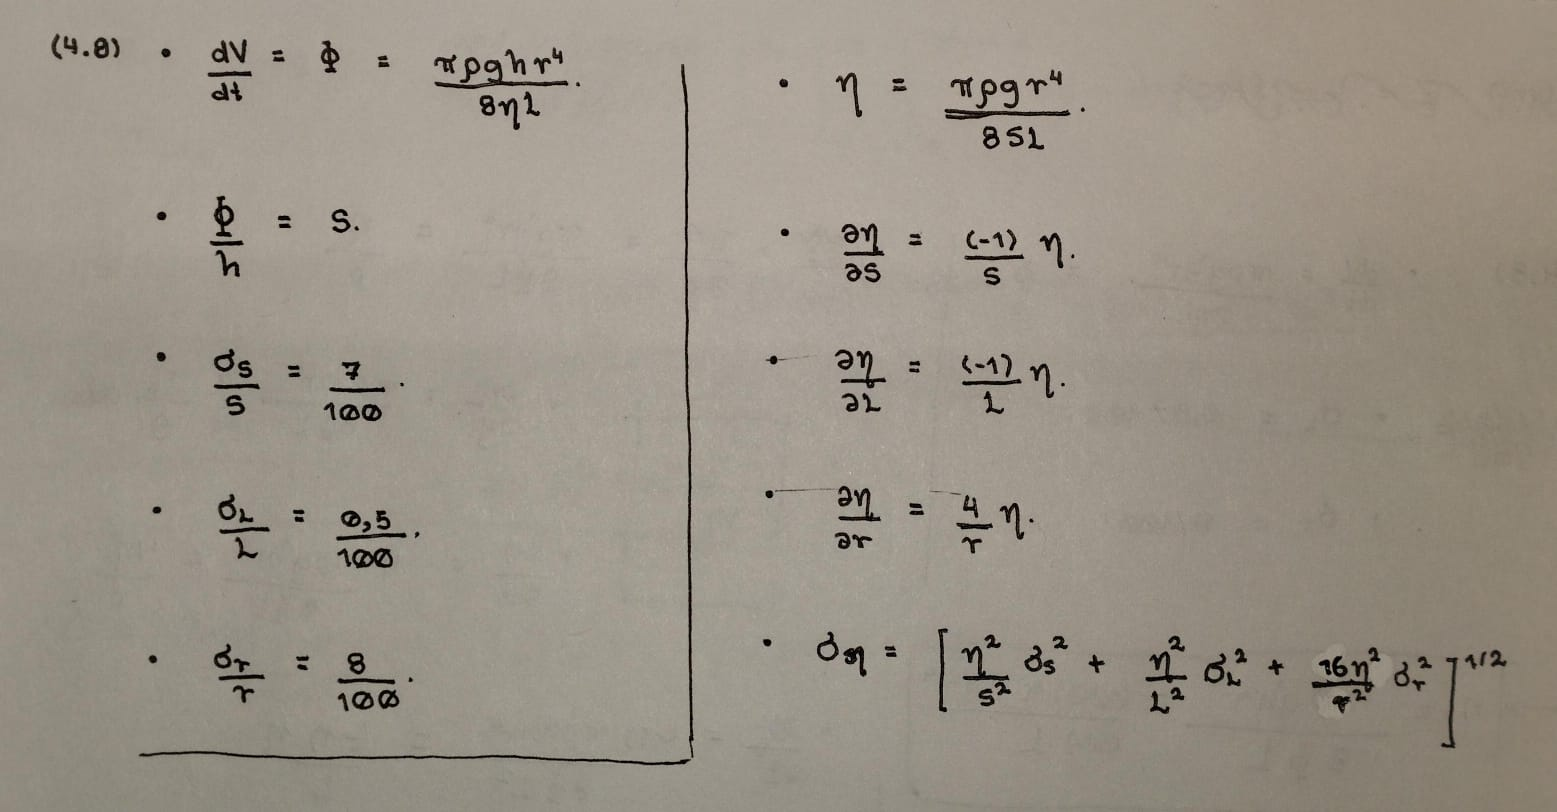

Lo cual se traduce numéricamente a:

In [85]:
frac_un_slope = 7/100
frac_un_L = 0.5/100
frac_un_r = 8/100

In [87]:
frac_un_viscosity = np.sqrt(frac_un_slope**2 + frac_un_L**2 +16*frac_un_r**2)
frac_un_viscosity

np.float64(0.32760494501762333)

Por tanto, se puede calcular la viscosidad con una precisión de $32\%$. Por otro lado, si se tiene más tiempo de experimental, este debe tiempo extra debería estar dedicado a medir mejor el radio del tubo, pues este tiene un mayor "weight" con respecto a las otras variables.

---

_Error spreadsheet for Van der Waals calculation_

Construct a spreadsheet which has the data from the
calculation in Section 4.2.2. Include cells for: **(i)** the
variables (molar volume and the absolute temperature),
**(ii)** the uncertainties, and **(iii)** the universal gas constant
as well as the parameters $a$ and $b$. Verify the numbers obtained in the worked example. Repeat the calculation for **(i)** $V_m = (2.000 ± 0.003) × 10^{−3} m3 mol^{−1}$
and $T = 400.0 ± 0.2 K$; **(ii)** $V_m = (5.000 ± 0.001) ×
10^{−4} m^3 mol^{−1}$ and $T = 500.0 ± 0.2 K$. Repeat the
calculations with the same variables for **(a)** He with
$a = 3.457 209 × 10^{−3} m^6 mol^{−2} \text{Pa}$, and $b = 2.37 ×
10^{−5} m^{3} mol^{−1}$; **(b)** CO2 with $a = 3.639 594 ×
10^{−1} m^6 mol^{−2} \text{Pa}$, and $b = 4.267 × 10^{−5} m^3 mol^{−1}$;
and **(c)** Ar with $a = 1.362 821 25 × 10^{−1} m^6 mol^{−2} \text{Pa}$,
and $b = 3.219 × 10^{−5} m^3 mol^{−1}$.

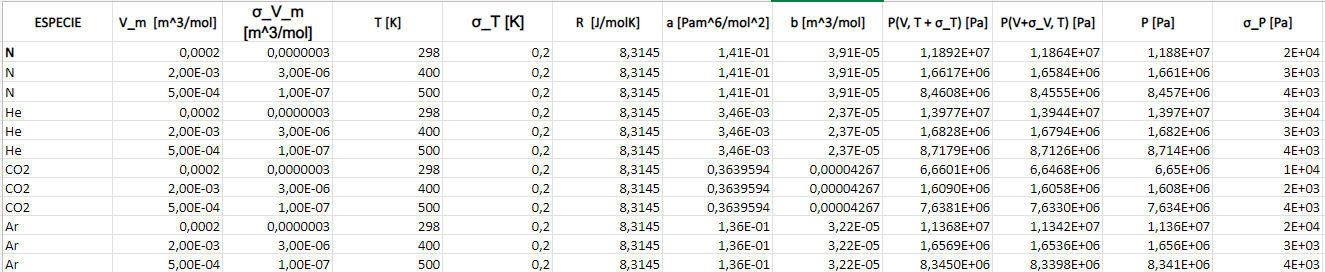

---

_Weighted mean_

A group of six students make the following measurements of the speed of light (all $\times 10^{-8} ms^{-1})$: $3.03 \pm 0.04$, $2.99\pm0.03$, $2.99\pm0.02$, $3.00\pm0.05$, $3.05\pm0.04$ and $2.97\pm0.02$. What should the cohort report as their combined result? If another student then reports $c = (3.0 \pm 0.3)\times10^{8}m s^{-1}$, is there any change to the cohort's combined measurement? If a further student resports $c = (4.01\pm0.01)\times10^{8}ms^{-1}$, is there any change to the cohort's combined measurment?

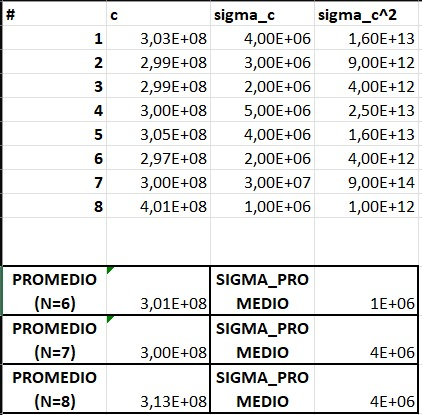

donde $\displaystyle \bar{x} = \frac{\sum_{i}x_i}{N}$, $\displaystyle \frac{\partial \bar{x}}{\partial x_i} = \frac{1}{N}$ y $\displaystyle \sigma_{\bar{x}} = \frac{1}{N}\sqrt{\sum_{i}\sigma^2_{x_i}}$. Los cambios provocados por las dos nuevas medidas se pueden ver al final de la tabla.